# Understand genomic data


Reference: https://medium.com/analytics-vidhya/coronavirus-covid-19-genome-analysis-using-biopython-8b8cb1f4a041

- DNA vs RNA: https://www.greelane.com/vi/khoa-h%E1%BB%8Dc-c%C3%B4ng-ngh%E1%BB%87-to%C3%A1n/khoa-h%E1%BB%8Dc/dna-versus-rna-608191/


- Dataset: https://www.kaggle.com/paultimothymooney/coronavirus-genome-sequence#MN908947.fna


# What are Genetic code and DNA codon?

The Genetic code is the set of rules used by living cells to translate information encoded within genetic material (DNA or mRNA sequences of nucleotide triplets, or codons) into proteins.
The standard genetic code is traditionally represented as an RNA codon table because, when proteins are made in a cell by ribosomes, it is mRNA that directs protein synthesis. The mRNA sequence is determined by the sequence of genomic DNA. Here are some features of codons:
Most codons specify an amino acid
2. Three “stop” codons mark the end of a protein
3. One “start” codon, AUG, marks the beginning of a protein and also encodes the amino acid methionine.

# Genetic codes

can be set independently for nucleus, mitochondria, plastids and hydrogenosomes
https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi


In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
#Load data 
from Bio import SeqIO

for sequence in SeqIO.parse('data/covid19-MN908947.fna', 'fasta'):
    print(sequence.seq)
    print(len(sequence), 'nucliotides')

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

In [3]:
#Load data into an alignable file
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

In [4]:
DNAsequence = SeqIO.read('data/covid19-MN908947.fna', 'fasta')
DNAsequence

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet()), id='MN908947.3', name='MN908947.3', description='MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

# Data transformation

Since input sequence is FASTA (DNA), and Coronavirus is RNA type of virus, we need to:
1. Transcribe DNA to RNA (ATTAAAGGTT… => AUUAAAGGUU…)
2. Translate RNA to Amino acid sequence (AUUAAAGGUU… => IKGLYLPR*Q…)

## RNA

In [5]:
# 1. DNA to RNA.  (T (thymine --> U (uracil)))
DNA = DNAsequence.seq
mRNA = DNA.transcribe()
print(mRNA)
print(f'Size: {len(mRNA)}')

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACACACGUCCAACUCAGUUUGCCUGUUUUACAGGUUCGCGACGUGCUCGUACGUGGCUUUGGAGACUCCGUGGAGGAGGUCUUAUCAGAGGCACGUCAACAUCUUAAAGAUGGCACUUGUGGCUUAGUAGAAGUUGAAAAAGGCGUUUUGCCUCAACUUGAACAGCCCUAUGUGUUCAUCAAACGUUCGGAUGCUCGAACUGCACCUCAUGGUCAUGUUAUGGUUGAGCUGGUAGCAGAACUCGAAGGCAUUCAGUACGGUCGUAGUGGUGAGACACUUGGUGUCCUUGUCCCUCAUGUGGGCGAAAUACCAGUGGCUUACCGCAAGGUUCUUCUUCGUAAGAACGGUAAUAAAGGAGCUGGUGGCCAUAGUUACGGCGCCGAUCUAAAGUCAUUUGACUUAGGCGACGAGCUUGGCACUGAUCCUUAUGAAGAUUUUCAAGAAAACUGGAACACUAAACAUAGCAGUGGUGUUACCCGUGAACUCAUGCGUGAGCUUAACGGAGGGGCAUACACUCGCUAUGUCGAUAACAACUUCUGUGGCCCUGAUGGCUACCCUCUUGAGUGCAUUAAAGACCUUCUAGCACGUGCUGGUAAAGCUUCAUGCACUUUGUCCGAACAACUGGACUUUAUUGACACUAAGAGGGGUGUAUACUGCUGCCGUGAACAUGAGCAUGAAAUUGCUUGGUACACGGAACGUUCU

## Amino acids
Proteins are made up of smaller units called amino acids, which are attached to one another in a long chains. 
There are 20 different types of amino acids that can be combined to make a protein. The sequence of amino acids determines each protein's unique 3D structure and its specific function.

https://www.hornetjuice.com/amino-acids-types/

- 20 amino acids: `FSYCLWPHQRIMTNKVADEG`

IMGT classes of the 20 common amino acids (Ref: http://www.imgt.org/IMGTeducation/Aide-memoire/_UK/aminoacids/IMGTclasses.html)
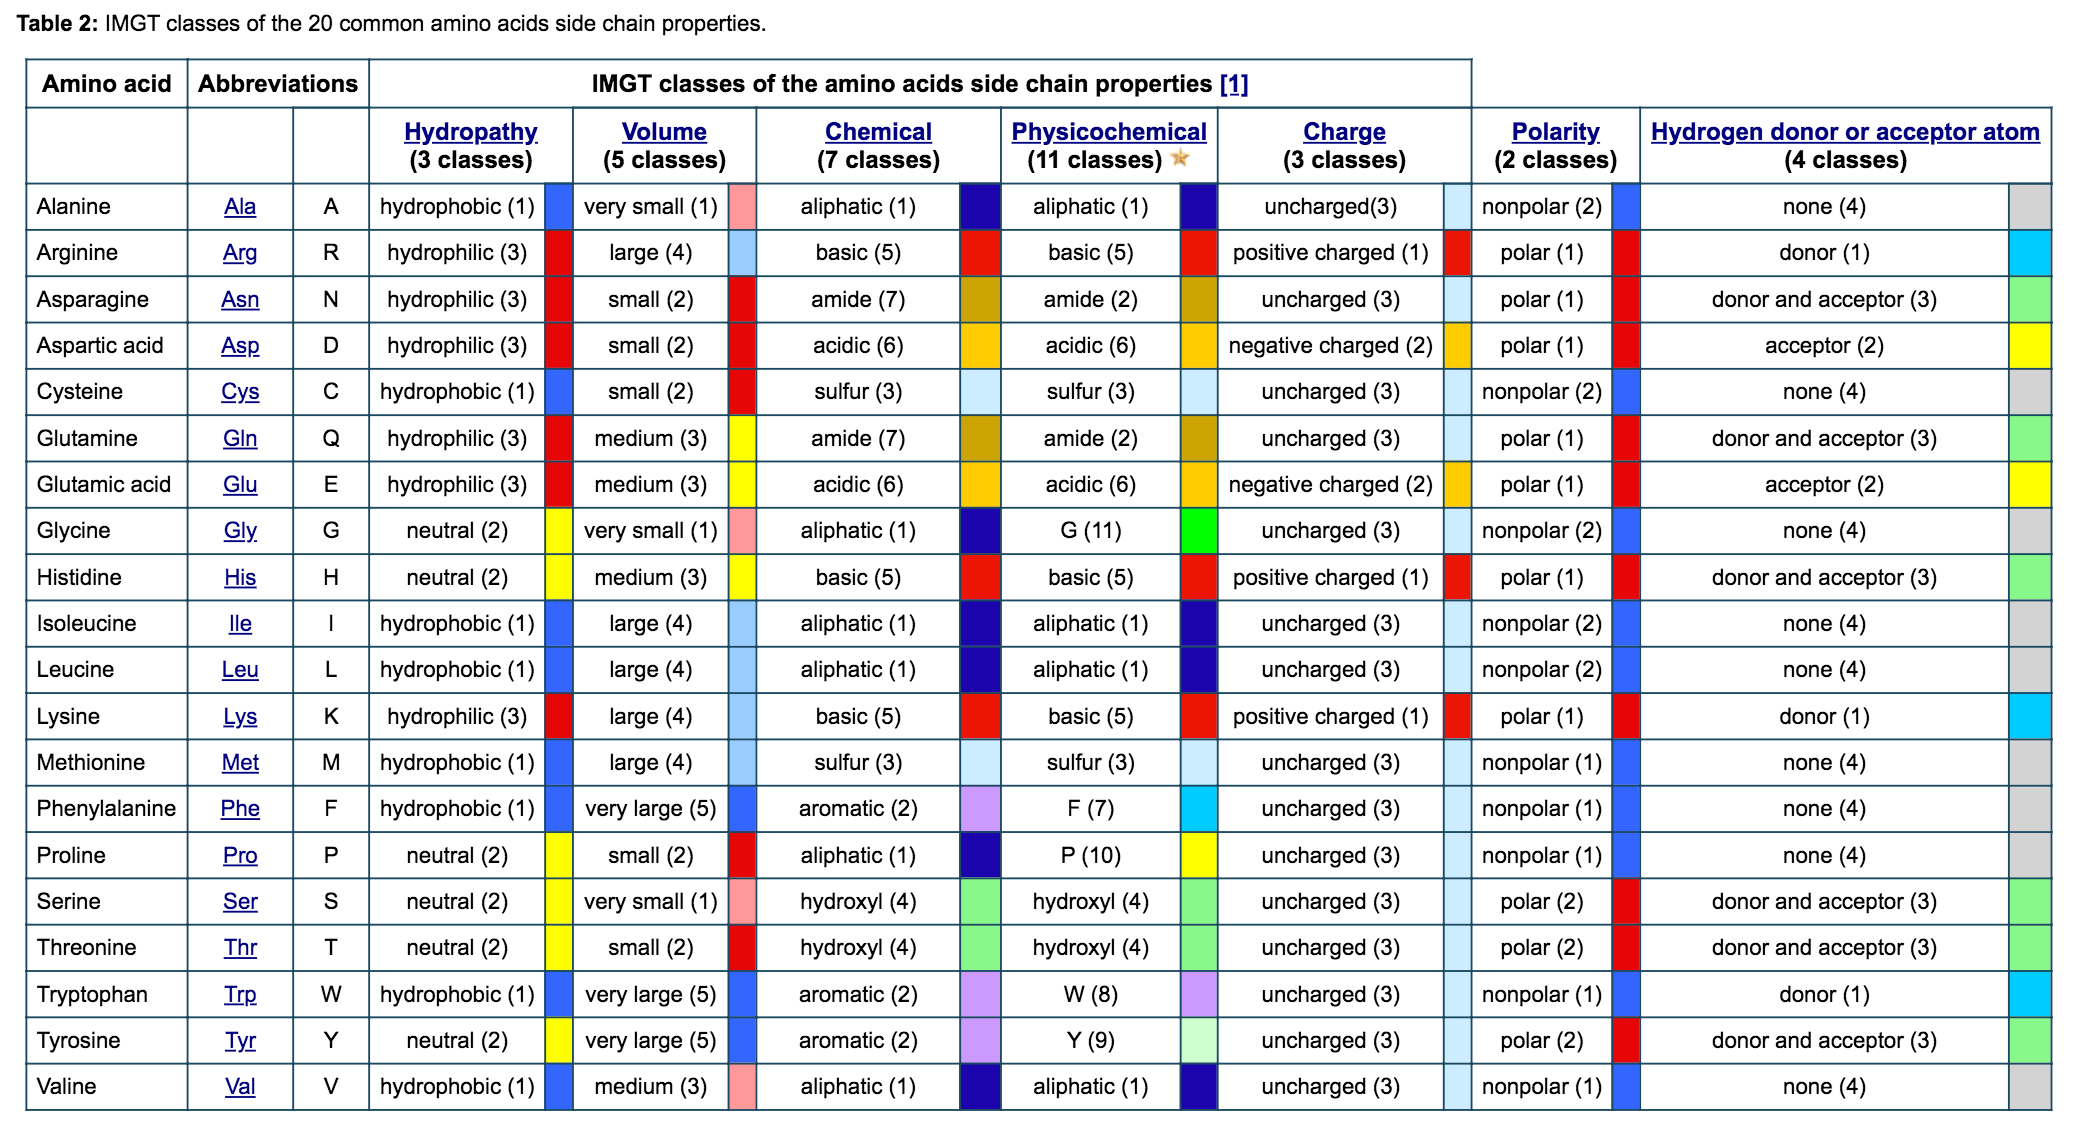

In [27]:
len("FSYCLWPHQRIMTNKVADEG")

20

In [9]:
# 2. RNA to amino-acid sequence

#because 3 mRNA are used to produce a single subunit of a protein, known as an amino acid 
# Load the condo table
from Bio.Data import CodonTable
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

## Proteins

In [8]:

# IKGLYLPR encodes the first protein (every letter encodes single amino-acid)
# QTNQLSISCRSVL encodes the second protein, and so on.
aacid = mRNA.translate(table=1, cds=False)
print('Amino Acid', aacid)
print("Length of Protein:",len(aacid))
print("Length of Original mRNA:",len(mRNA))

Amino Acid IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*LRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*SFMHFVRTTGLY*H*EGCILLP*T*A*NCLVHGTF*KEL*IADTF*N*IGKEI*HLQWGMSKFCISLKFHNQDYSTKG*KEKA*WLYG*NSICLSSCVTK*MQPNVPFNSHEV*SLW*NFMADGRFC*SHLRILWH*EFD*RRCHYLWLLTPKCCC*NLLSSMSQFRSRT*A*SCRIP**IWLENHSS*GWSHYCLWRLCVLLCWLP*QVCLLGSTC*R*HRL*PYRCCWRRFRRS**QPS*NTPKRESQHQYCW*L*T**RDRHYFGIFFCFHKCFCGNCERFGL*SIQTNC*ILW*F*SYKRKS*KRCLEYW*TEINTESSLCICIRGCSCCTINFLPHS*NCSKFCACFTEGRYNNTRWNFTVFTETH*CYDVHI*FGY*QSSCNGLHYRWCCSVDFAVAN*HLWHCL*KTQTRP*LA*REV*GRCRVS*RRLGNC*IYLNLCL*NCRWTNCHLCKGN*GECSDIL*ACK*IFGFVC*LYHYWWS*T*SLEFR*NICHALKGIVQKVC*IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW*FTTIRTTY**SC*SSIGWYTSLY*RAYVARNQRHRKVLCPCT*YDGNKQYLHTQRRCTNKGYFW**HCDRSARLQECEYHF*T**KD**ST**EVLCLYS*TRYRSK*VRLCCGRCCHKNFATSI*ITYTTGH*FR*VE

In [12]:
#3. Remove unfunctional protein
# short-length proteins are likely to play a little biological role --> removed
# 20 amino acids long is the smallest known functional protein

#Identify all the Proteins (chains of amino acids)
proteins = aacid.split('*')
print(f"Before removing, number of proteins: {len(proteins)}")
proteins = [p for p in proteins if len(p) >=20]
print(f"After removing, number of proteins: {len(proteins)}")

Before removing, number of proteins: 775
After removing, number of proteins: 80


## Protein analysis -> Feature extraction using Protparam

Available Tools in ProtParam:

- `count_amino_acids`: Simply count the number times an amino acid is repeated in the protein sequence.
- `get_amino_acids_percent`: The same as only returns the number in the percentage of the entire sequence.
- `molecular_weight`: Calculates the molecular weight of a protein.
- `aromaticity`: Calculates the aromaticity value of a protein according to Lobry & Gautier (1994, Nucleic Acids Res., 22, 3174-3180).
- `flexibility`: Implementation of the flexibility method of Vihinen et al. (1994, Proteins, 19, 141-149).
- `isoelectric_point`: This method uses the module IsoelectricPoint to calculate the pI of a protein.
- `secondary_structure_fraction`: This method returns a list of the fraction of amino acids that tend to be in helix, turn or sheet.
- Amino acids in Helix: V, I, Y, F, W, L.
- Amino acids in Turn: N, P, G, S.
- Amino acids in Sheet: E, M, A, L.


In [17]:
poi_list = []
MW_list = []
from Bio.SeqUtils import ProtParam
for record in proteins:
    print("\n")
    X = ProtParam.ProteinAnalysis(str(record))
    POI = X.count_amino_acids()
    poi_list.append(POI)
    MW = X.molecular_weight()
    MW_list.append(MW)
    print("Protein of Interest = ", POI)
    print("Amino acids percent =    ",str(X.get_amino_acids_percent()))
    print("Molecular weight = ", MW_list)
    print("Aromaticity = ", X.aromaticity())
    print("Flexibility = ", X.flexibility())
    print("Isoelectric point = ", X.isoelectric_point())
    print("Secondary structure fraction = ",   X.secondary_structure_fraction())



Protein of Interest =  {'A': 0, 'C': 1, 'D': 1, 'E': 1, 'F': 2, 'G': 1, 'H': 0, 'I': 3, 'K': 0, 'L': 3, 'M': 0, 'N': 1, 'P': 2, 'Q': 2, 'R': 4, 'S': 7, 'T': 4, 'V': 3, 'W': 0, 'Y': 0}
Amino acids percent =     {'A': 0.0, 'C': 0.02857142857142857, 'D': 0.02857142857142857, 'E': 0.02857142857142857, 'F': 0.05714285714285714, 'G': 0.02857142857142857, 'H': 0.0, 'I': 0.08571428571428572, 'K': 0.0, 'L': 0.08571428571428572, 'M': 0.0, 'N': 0.02857142857142857, 'P': 0.05714285714285714, 'Q': 0.05714285714285714, 'R': 0.11428571428571428, 'S': 0.2, 'T': 0.11428571428571428, 'V': 0.08571428571428572, 'W': 0.0, 'Y': 0.0}
Molecular weight =  [3896.388]
Aromaticity =  0.05714285714285714
Flexibility =  [1.0254166666666666, 1.0115238095238097, 0.9737499999999999, 0.9758214285714286, 0.9602857142857143, 0.9736428571428574, 0.9377261904761905, 0.9531309523809526, 0.9757857142857143, 0.9605952380952383, 0.9992738095238096, 0.9844642857142858, 0.9694166666666666, 0.9892738095238094, 1.004392857142857

Isoelectric point =  9.50445556640625
Secondary structure fraction =  (0.5365853658536586, 0.21951219512195125, 0.2682926829268293)


Protein of Interest =  {'A': 1, 'C': 1, 'D': 0, 'E': 0, 'F': 1, 'G': 0, 'H': 1, 'I': 0, 'K': 2, 'L': 1, 'M': 0, 'N': 1, 'P': 2, 'Q': 1, 'R': 1, 'S': 1, 'T': 3, 'V': 1, 'W': 4, 'Y': 1}
Amino acids percent =     {'A': 0.045454545454545456, 'C': 0.045454545454545456, 'D': 0.0, 'E': 0.0, 'F': 0.045454545454545456, 'G': 0.0, 'H': 0.045454545454545456, 'I': 0.0, 'K': 0.09090909090909091, 'L': 0.045454545454545456, 'M': 0.0, 'N': 0.045454545454545456, 'P': 0.09090909090909091, 'Q': 0.045454545454545456, 'R': 0.045454545454545456, 'S': 0.045454545454545456, 'T': 0.13636363636363635, 'V': 0.045454545454545456, 'W': 0.18181818181818182, 'Y': 0.045454545454545456}
Molecular weight =  [3896.388, 5313.909099999998, 2268.5276000000003, 2240.4102, 2856.2400000000002, 3103.5840000000003, 2945.3948000000005, 3377.7007000000003, 2360.6063, 4677.1971, 2678.9358000000007, 2

<BarContainer object of 20 artists>

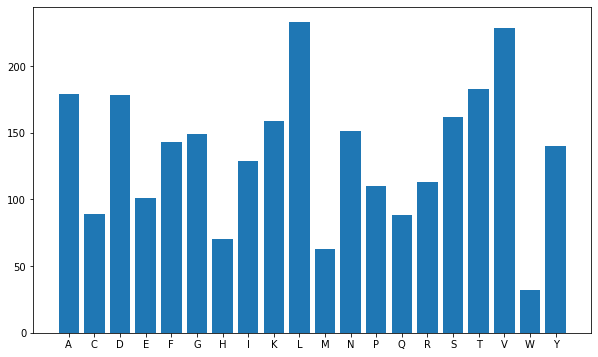

In [18]:
MoW = pd.DataFrame(data = MW_list,columns = ["Molecular Weights"] )
#plot POI
poi_list = poi_list[48]
plt.figure(figsize=(10,6));
plt.bar(poi_list.keys(), list(poi_list.values()), align='center')

## Notes: $\alpha$-helices
|||--> the number of Lysines(L) and Valines(V) are high in this protein which indicates a good number of Alpha-Helices.


>Different amino-acid sequences have different propensities for forming α-helical structure. Methionine, alanine, leucine, glutamate, and lysine uncharged ("MALEK" in the amino-acid 1-letter codes) all have especially high helix-forming propensities, whereas proline and glycine have poor helix-forming propensities.[21] Proline either breaks or kinks a helix, both because it cannot donate an amide hydrogen bond (having no amide hydrogen), and also because its sidechain interferes sterically with the backbone of the preceding turn – inside a helix, this forces a bend of about 30° in the helix's axis.[12] However, proline is often seen as the first residue of a helix, it is presumed due to its structural rigidity. At the other extreme, glycine also tends to disrupt helices because its high conformational flexibility makes it entropically expensive to adopt the relatively constrained α-helical structure. <wikipedia>

*Hydrocarbon-Stapled Short α-Helical Peptides*
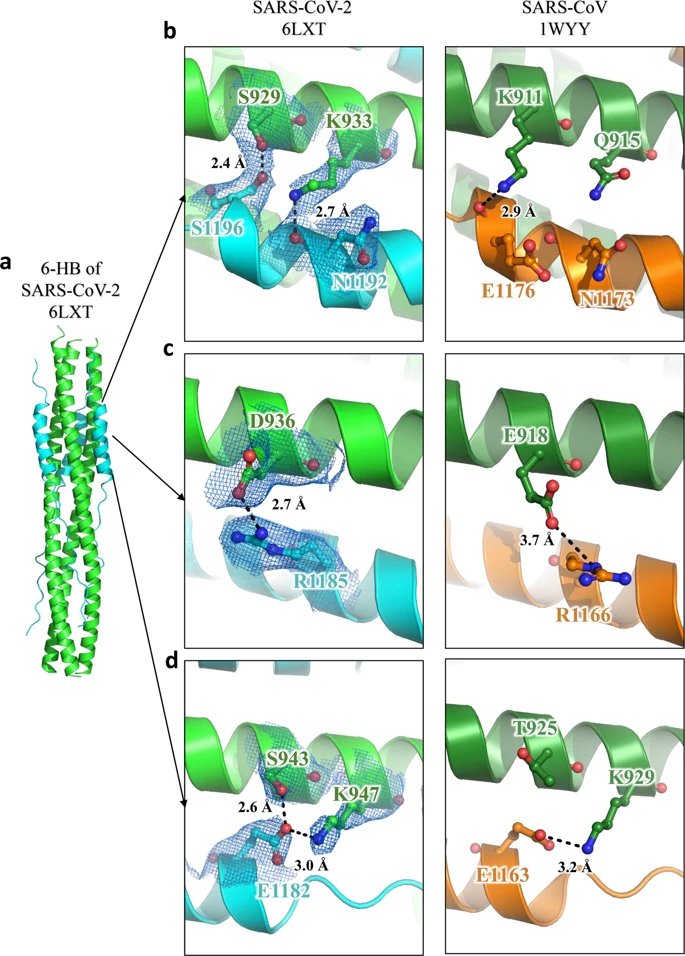
Ref: https://www.nature.com/articles/s41422-020-0305-x

**Different viewpoint**: roles of amino acids

- Valine (Leucine & Isoleucine) (V): perform important functions of increasing proteins and serving as an energy source 

- Lysine (L): a representative essential amino acid, tends to be insufficient when we are on a diet centered on bread or rice. If amino acids such as lysine are deficient it may lead to growth failure.

- Tryptophan (W): An essential amino acid which is used to produce various useful amines.

# Comparing Human Coronavirus RNA


In [22]:
sars = SeqIO.read("data/sars.fasta", "fasta")
mers = SeqIO.read("data/mers.fasta", "fasta")
cov2 = SeqIO.read("data/cov2.fasta", "fasta")
print(len(sars.seq), len(mers.seq), len(cov2.seq))

29751 30119 29903


In [21]:
!Squiggle data/cov2.fasta data/sars.fasta data/mers.fasta --method=gates --separate

You are plotting a long sequence (29903 bp). This may be very slow, although downsampling might help. Do you want to continue? [y/N]: ^C
Aborted!


## Sequence alignment

the process of arranging two or more sequences (of DNA, RNA or protein sequences) in a specific order to identify the region of similarity between them.

to infer a lot of information like what traits are conserved between species, how close different species genetically are, how species evolve, etc.

Pairwise sequence alignment compares only two sequences at a time and provides the best possible sequence alignments.

In [24]:
from Bio import pairwise2

pairwise2.align??

In [26]:
# Alignments using pairwise2 alghoritm
sars_cov = pairwise2.align.globalxx(sars.seq, cov2.seq, one_alignment_only=True, score_only=True)
print('SARS/COV Similarity (%):', sars_cov / len(sars.seq) * 100)
mers_cov = pairwise2.align.globalxx(mers.seq, cov2.seq, one_alignment_only=True, score_only=True)
print('MERS/COV Similarity (%):', mers_cov / len(mers.seq) * 100)
mers_sars = pairwise2.align.globalxx(mers.seq, sars.seq, one_alignment_only=True, score_only=True)
print('MERS/SARS Similarity (%):', mers_sars / len(sars.seq) * 100)

SARS/COV Similarity (%): 83.33837518066619
MERS/COV Similarity (%): 69.39141405757164
MERS/SARS Similarity (%): 69.93714496991697


Scientists at the University of Liverpool, who have also joined the Whole-Genome Sequencing Alliance have explained that understanding the unique genetic code taken from individuals samples of infected patients will allow them to understand:

- Who is becoming ill
- The type of illness they have, and why
- Whether COVID-19 caused the illness
- Whether the patient's immune system is over-responding

An additional aim is to understand not only how the virus is spreading, but also whether different strains are beginning to emerge.

In [29]:
%timeit sars_cov = pairwise2.align.globalxx(sars.seq, cov2.seq, one_alignment_only=True, score_only=True)

12 s ± 52.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
